<a href="https://colab.research.google.com/github/vadhri/ai-notebook/blob/main/timeseries/forecasting_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("khushikyad001/air-quality-weather-and-respiratory-health")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'air-quality-weather-and-respiratory-health' dataset.
Path to dataset files: /kaggle/input/air-quality-weather-and-respiratory-health


In [106]:
import pandas as pd

In [107]:
!ls {path}/air_quality_health_dataset.csv

path += '/air_quality_health_dataset.csv'

/kaggle/input/air-quality-weather-and-respiratory-health/air_quality_health_dataset.csv


In [108]:
#load csv at path
data_df = pd.read_csv(path, parse_dates=['date'], index_col='date')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000 entries, 2020-01-01 to 2020-03-20
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   region                  3000 non-null   object 
 1   AQI                     3000 non-null   float64
 2   PM2.5                   3000 non-null   float64
 3   PM10                    3000 non-null   float64
 4   NO2                     3000 non-null   float64
 5   SO2                     3000 non-null   float64
 6   CO                      3000 non-null   float64
 7   O3                      3000 non-null   float64
 8   temperature             3000 non-null   float64
 9   humidity                3000 non-null   float64
 10  wind_speed              3000 non-null   float64
 11  precipitation           3000 non-null   float64
 12  hospital_visits         3000 non-null   int64  
 13  emergency_visits        3000 non-null   int64  
 14  mobility_index        

In [109]:
from statsmodels.stats.descriptivestats import describe
data_df_desc = describe(data_df, stats=None, numeric=True, categorical=True, alpha=0.05, use_t=False, percentiles=(1, 5, 10, 25, 50, 75, 90, 95, 99), ntop=5)

#add col and coeff var to a data frame
# define 2 cols in the data frame
coeff = pd.DataFrame(columns=["Col", "coeff"])

for col in data_df_desc.columns:
  coeff.loc[len(coeff)] = [col, data_df_desc[col]['coef_var']]

coeff.sort_values('coeff').head(50)

,Col,coeff
13,mobility_index,0.126802
16,mask_usage_rate,0.191460
0,AQI,0.196106
7,temperature,0.197479
11,hospital_visits,0.223869
3,NO2,0.247159
4,SO2,0.248414
1,PM2.5,0.254641
2,PM10,0.256328
6,O3,0.267822


In [110]:
#print schoolclosures col
data_df["region"]

,region
date,
2020-01-01,East
2020-01-02,Central
2020-01-03,East
2020-01-04,West
2020-01-05,South
...,...
2020-03-16,West
2020-03-17,Central
2020-03-18,East


#### Stationarity test

In [111]:
from statsmodels.tsa.stattools import adfuller
for col in data_df.select_dtypes(include='number').columns:
  results = adfuller(data_df[col])
  #more negative the statistic, more stationary the data.
  print (col, ' Test statistic : ', results[0], 'p-value : ', results[1])

AQI  Test statistic :  -55.29498217817158 p-value :  0.0
PM2.5  Test statistic :  -56.35231734395458 p-value :  0.0
PM10  Test statistic :  -55.34585057481446 p-value :  0.0
NO2  Test statistic :  -54.09846378828082 p-value :  0.0
SO2  Test statistic :  -55.28542872299045 p-value :  0.0
CO  Test statistic :  -55.45805251665473 p-value :  0.0
O3  Test statistic :  -53.62124590067753 p-value :  0.0
temperature  Test statistic :  -54.93686977086834 p-value :  0.0
humidity  Test statistic :  -55.76543894129787 p-value :  0.0
wind_speed  Test statistic :  -53.938982898944815 p-value :  0.0
precipitation  Test statistic :  -54.673494049162095 p-value :  0.0
hospital_visits  Test statistic :  -55.800264510435106 p-value :  0.0
emergency_visits  Test statistic :  -55.38456091296314 p-value :  0.0
mobility_index  Test statistic :  -56.19637075619046 p-value :  0.0
school_closures  Test statistic :  -54.912225336597224 p-value :  0.0
public_transport_usage  Test statistic :  -37.87358312579879 p

<Axes: xlabel='date'>

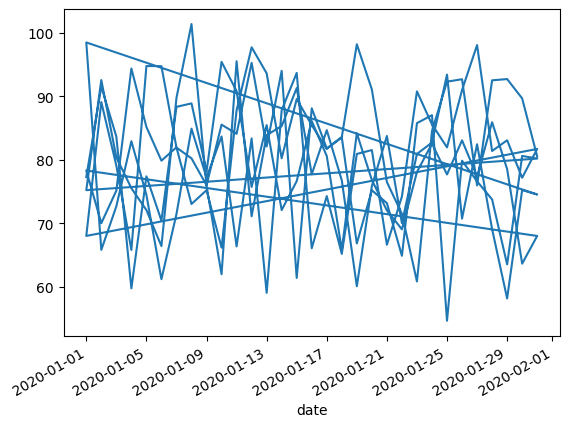

In [112]:
data_df.loc['2020-01']['mobility_index'].plot()

In [113]:
data_df.isnull().sum()


,0
region,0
AQI,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
O3,0
temperature,0
humidity,0


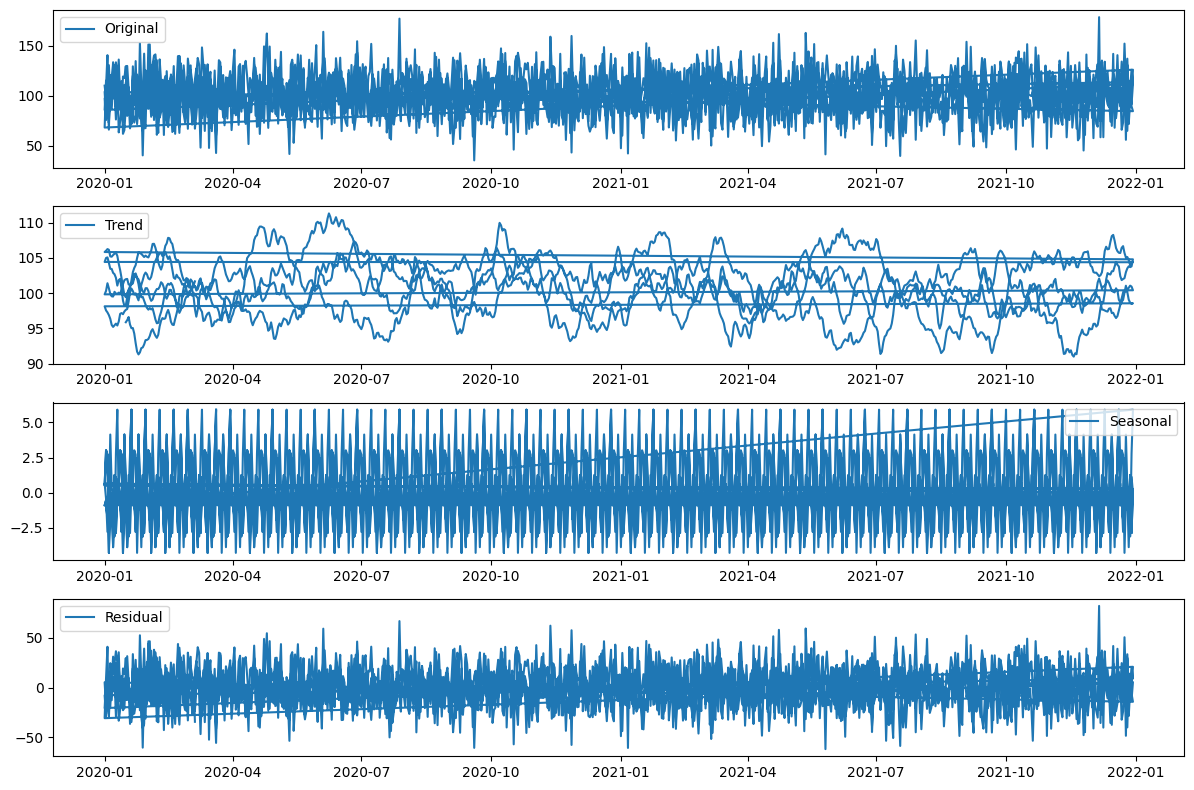

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

series = data_df['AQI']

decomposition = seasonal_decompose(series, model='additive', period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot components
plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.plot(series, label='Original')
plt.legend()
plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(4,1,4)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()


In [115]:
data_df['AQI'].sort_values()


,AQI
date,
2020-09-19,35.174653
2021-07-18,39.609757
2020-01-28,40.177281
2021-05-26,41.192227
2020-05-11,41.572990
...,...
2020-04-25,162.198371
2021-05-12,162.754971
2020-06-04,163.862151


In [162]:
# forecast using ARIMA
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

model = ARIMA(data_df['AQI'], order=(2,1,1))
results = model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsm

In [164]:
# Get the last date of your AQI series
last_date = data_df.index.sort_values()[-1]
print ('Last date = ', last_date)

future_index = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=30, freq="D")



# Forecast 30 days ahead (out-of-sample)
forecast = results.get_forecast(steps=30)

# Build future date index
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=30, freq='D')

# Extract forecast mean and intervals
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

mean_forecast.index = future_index
conf_int.index = future_index

lower_limits = conf_int.iloc[:, 0]
upper_limits = conf_int.iloc[:, 1]

# Combine into DataFrame with FUTURE dates
forecast_df = pd.DataFrame({
    'date': future_dates,
    'forecast': mean_forecast.values,
    'lower_ci': lower_limits.values,
    'upper_ci': upper_limits.values
})

print (mean_forecast)

Last date =  2021-12-30 00:00:00
2021-12-31    100.620642
2022-01-01    100.674520
2022-01-02    100.639696
2022-01-03    100.639539
2022-01-04    100.639861
2022-01-05    100.639859
2022-01-06    100.639856
2022-01-07    100.639856
2022-01-08    100.639857
2022-01-09    100.639857
2022-01-10    100.639857
2022-01-11    100.639857
2022-01-12    100.639857
2022-01-13    100.639857
2022-01-14    100.639857
2022-01-15    100.639857
2022-01-16    100.639857
2022-01-17    100.639857
2022-01-18    100.639857
2022-01-19    100.639857
2022-01-20    100.639857
2022-01-21    100.639857
2022-01-22    100.639857
2022-01-23    100.639857
2022-01-24    100.639857
2022-01-25    100.639857
2022-01-26    100.639857
2022-01-27    100.639857
2022-01-28    100.639857
2022-01-29    100.639857
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


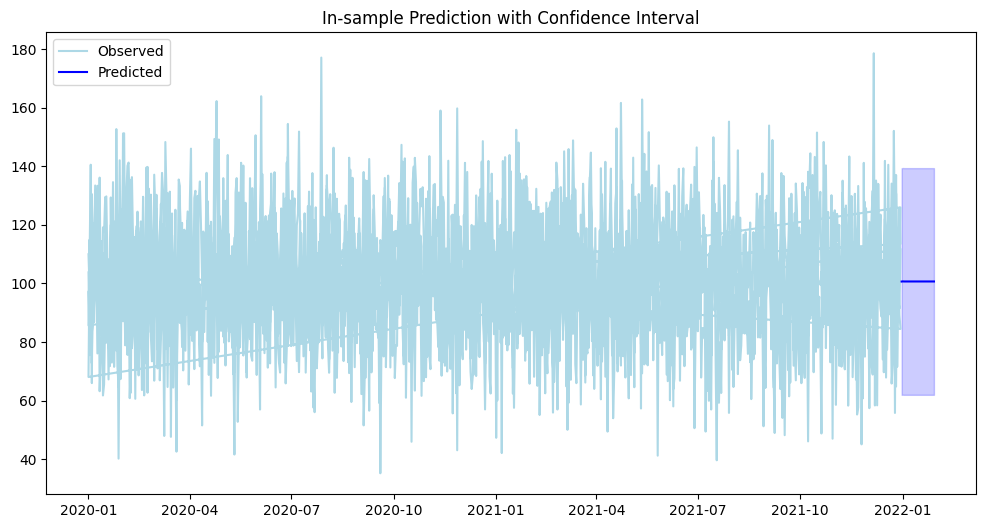

In [165]:
# Get predictions with confidence intervals
plt.figure(figsize=(12,6))
plt.plot(data_df.index, data_df['AQI'], label="Observed", color="lightblue")
plt.plot(future_index, mean_forecast, label="Predicted", color="blue")

# Confidence interval shading
plt.fill_between(future_index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color="blue", alpha=0.2)

plt.legend()
plt.title("In-sample Prediction with Confidence Interval")
plt.show()


In [118]:
!pip install -q pyentrp



In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pyentrp import entropy as ent


Permutation Entropy of residuals: 2.5837166015138884


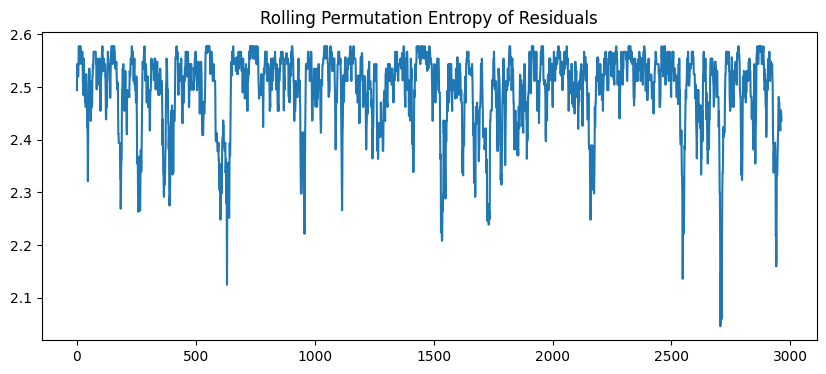

In [120]:
series = data_df['mobility_index']

# Seasonal decomposition
decomposition = seasonal_decompose(series, model='additive', period=7)
residual = decomposition.resid.dropna()  # Remove NaNs from trend/seasonal edges

# Calculate permutation entropy
pe = ent.permutation_entropy(residual.values, order=3, delay=1)
print("Permutation Entropy of residuals:", pe)

# Optional: Plot rolling permutation entropy
window = 30
rolling_pe = [ent.permutation_entropy(residual.values[i:i+window], order=3, delay=1)
              for i in range(len(residual)-window)]
plt.figure(figsize=(10,4))
plt.plot(rolling_pe)
plt.title("Rolling Permutation Entropy of Residuals")
plt.show()

Permutation Entropy of residuals: 2.1957091674029727


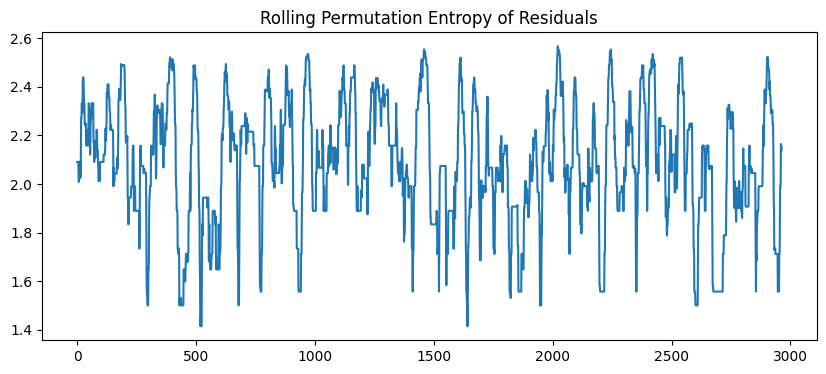

In [121]:
series = data_df['school_closures']

# Seasonal decomposition
decomposition = seasonal_decompose(series, model='additive', period=7)
residual = decomposition.resid.dropna()  # Remove NaNs from trend/seasonal edges

# Calculate permutation entropy
pe = ent.permutation_entropy(residual.values, order=3, delay=1)
print("Permutation Entropy of residuals:", pe)

# Optional: Plot rolling permutation entropy
window = 30
rolling_pe = [ent.permutation_entropy(residual.values[i:i+window], order=3, delay=1)
              for i in range(len(residual)-window)]
plt.figure(figsize=(10,4))
plt.plot(rolling_pe)
plt.title("Rolling Permutation Entropy of Residuals")
plt.show()